In [89]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query10a = """
    SELECT
    systems.record_id,
    cast(selectsystems.created as date),
    cast(selectsystems.status_last_modified as date),
    cast(selectsystems.status_last_modified as date)-cast(selectsystems.created as date) as "Period",
    selectsystems.status,
    selectsystems.billing_style,
    cast(case when selectsystems.billing_style = 'Hourly' then '1' else '0' end as integer) as "Billing Style"
    FROM 
    selectsystems 
    WHERE selectsystems.status = 'Inactive' and cast(selectsystems.status_last_modified as date) > '2022-05-01'
"""
dataset10a = sqlio.read_sql_query(query10a,conn)
df10a = pd.DataFrame(data=dataset10a)
df10a.to_csv('analysis10a.csv')
df10a.corr(method='pearson')



,record_id,Period,Billing Style
record_id,1.000000,-0.978793,-0.317950
Period,-0.978793,1.000000,0.406869
Billing Style,-0.317950,0.406869,1.000000


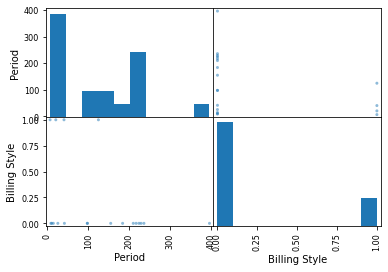

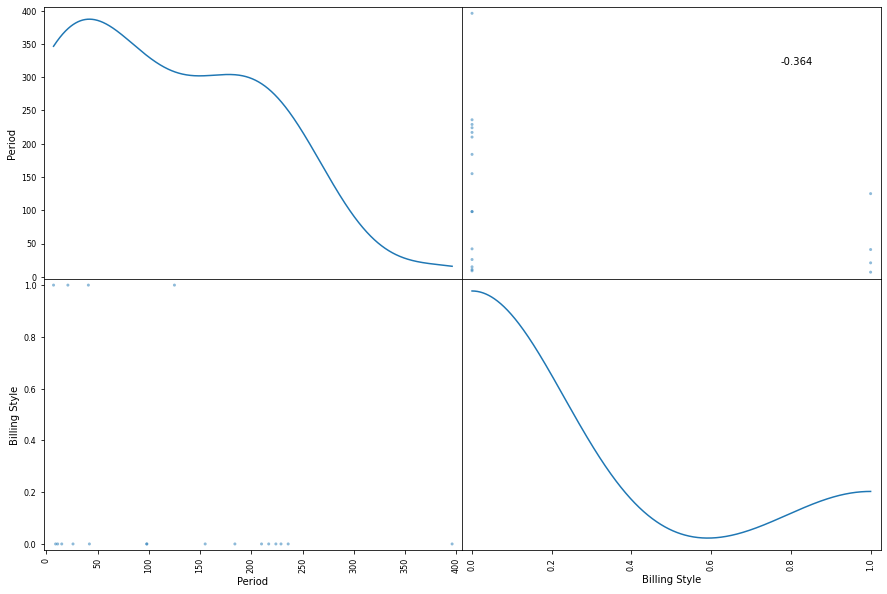

In [96]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query11a = """
    SELECT
    cast(selectsystems.created as date),
    cast(selectsystems.status_last_modified as date),
    cast(selectsystems.status_last_modified as date)-cast(selectsystems.created as date) as "Period",
    selectsystems.status,
    selectsystems.billing_style,
    cast(case when selectsystems.billing_style = 'Retainer' then '1' else '0' end as integer) as "Billing Style"
    FROM 
    selectsystems 
    WHERE selectsystems.status = 'Inactive' and cast(selectsystems.status_last_modified as date) > '2022-05-01'
"""
dataset11a = sqlio.read_sql_query(query11a,conn)
df11a = pd.DataFrame(data=dataset11a)
df11a.to_csv('analysis11a.csv')
corr1 = df11a.corr(method='pearson')
corr1.style.background_gradient(cmap='coolwarm')

xdata=df11a['Period']
ydata=df11a['Billing Style']

pd.plotting.scatter_matrix(df11a)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
df = pd.DataFrame(data=dataset11a)
axes = scatter_matrix(df, alpha=0.5, figsize=(15, 10), diagonal='kde')
corr = df.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

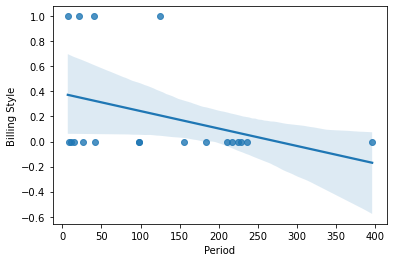

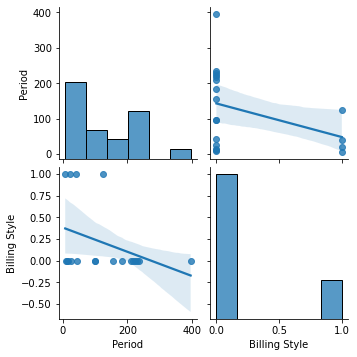

In [97]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
query11a = """
    SELECT
    cast(sys.created as date),
    cast(sys.status_last_modified as date),
    cast(sys.status_last_modified as date)-cast(sys.created as date) as "Period",
    sys.status,
    sys.billing_style,
    cast(case when sys.billing_style = 'Retainer' then '1' else '0' end as integer) as "Billing Style"
    FROM 
    sys 
    WHERE sys.status = 'Inactive' and cast(sys.status_last_modified as date) > '2022-05-01'
"""
dataset11a = sqlio.read_sql_query(query11a,conn)
df11a = pd.DataFrame(data=dataset11a)
df11a.to_csv('analysis11a.csv')
corr1 = df11a.corr(method='pearson')
corr1.style.background_gradient(cmap='coolwarm')

xdata=df11a['Period']
ydata=df11a['Billing Style']

import seaborn as sns

# use the function regplot to make a scatterplot
sns.regplot(x=xdata, y=ydata)
sns.pairplot(df11a, kind="reg")



     Cost to Client
0             100.0
1              95.0
2             100.0
3              75.0
4             130.0
..              ...
144           110.0
145           100.0
146            95.0
147           350.0
148           185.0

[149 rows x 1 columns]


C:\Users\Nik Harith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NIKHAR~1\AppData\Local\Temp/ipykernel_20232/2970704180.py:57: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


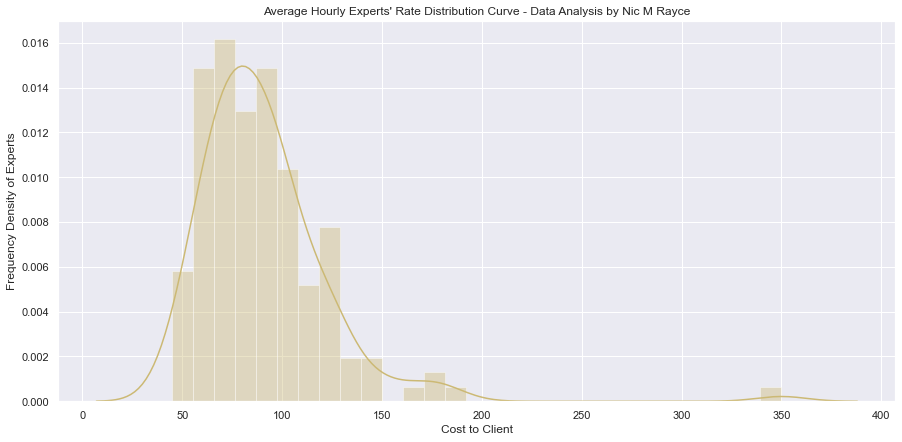

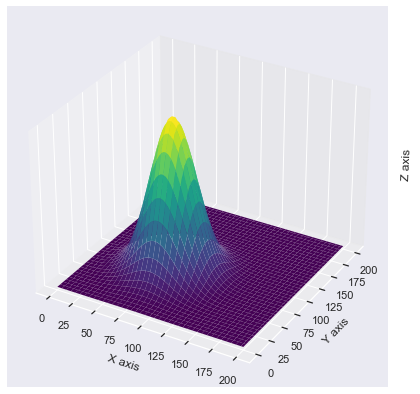

In [83]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query12a = """
    SELECT
    selectsystems.cost_to_client as "Cost to Client"
    FROM 
    selectsystems
    WHERE 
    selectsystems.billing_style = 'Hourly'
"""
dataset12a = sqlio.read_sql_query(query12a,conn)
df12a = pd.DataFrame(data=dataset12a)
df12a.to_csv('analysis12a.csv')
print(df12a)

import seaborn as sns, numpy as np
plt.figure(figsize=(15,7))
plt.title("Average Hourly Experts' Rate Distribution Curve - Data Analysis by Nic M Rayce")
plt.xlabel('Hourly Cost to Clients')
plt.ylabel('Frequency Density of Experts') 
sns.set_theme(); np.random.seed(0)
x = df12a['Cost to Client']
ax = sns.distplot(x, color="y")



import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 80
variance_x = 500

mu_y = 80
variance_y = 500

#Create grid and multivariate normal
x = np.linspace(0,200,80)
y = np.linspace(0,200,80)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize=(15,7))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])
plt.show()

     Hourly Cost to Client
0                    100.0
1                     95.0
2                    100.0
3                     75.0
4                    130.0
..                     ...
144                  110.0
145                  100.0
146                   95.0
147                  350.0
148                  185.0

[149 rows x 1 columns]


C:\Users\Nik Harith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


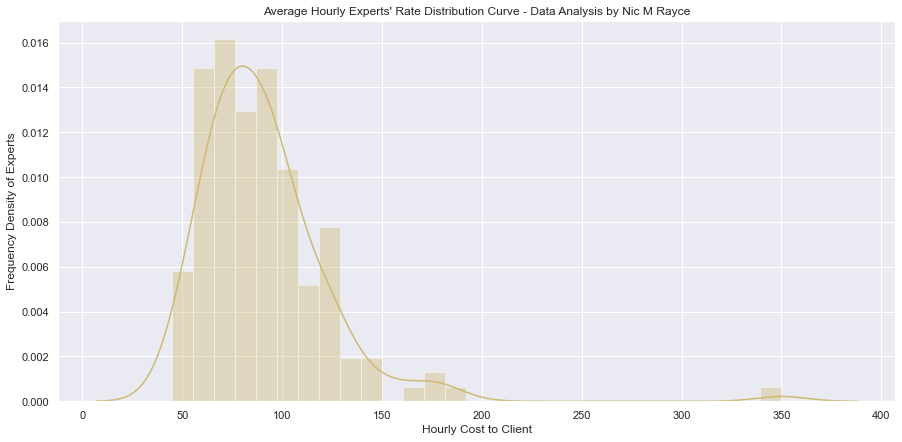

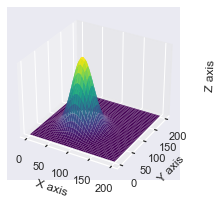

In [87]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query12a = """
    SELECT
    selectsystems.cost_to_client as "Hourly Cost to Client"
    FROM 
    selectsystems
    WHERE 
    selectsystems.billing_style = 'Hourly'
"""
dataset12a = sqlio.read_sql_query(query12a,conn)
df12a = pd.DataFrame(data=dataset12a)
df12a.to_csv('analysis12a.csv')
print(df12a)

import seaborn as sns, numpy as np
ax = fig.add_subplot(2, 1, 1)
plt.figure(figsize=(15,7))
plt.title("Average Hourly Experts' Rate Distribution Curve - Data Analysis by Nic M Rayce")
plt.xlabel('Hourly Cost to Clients')
plt.ylabel('Frequency Density of Experts') 
sns.set_theme(); np.random.seed(0)
x = df12a['Hourly Cost to Client']
ax = sns.distplot(x, color="y")



import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 80
variance_x = 500

mu_y = 80
variance_y = 500

#Create grid and multivariate normal
x = np.linspace(0,200,80)
y = np.linspace(0,200,80)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])
plt.show()

   Count Billing Style                   Type
0    131        Hourly  Individual Freelancer
1     18     Flat Rate  Individual Freelancer
2     13      Retainer  Individual Freelancer
   Count Billing Style             Type
0     15      Retainer  Boutique Agency
1     11     Flat Rate  Boutique Agency
2      7        Hourly  Boutique Agency


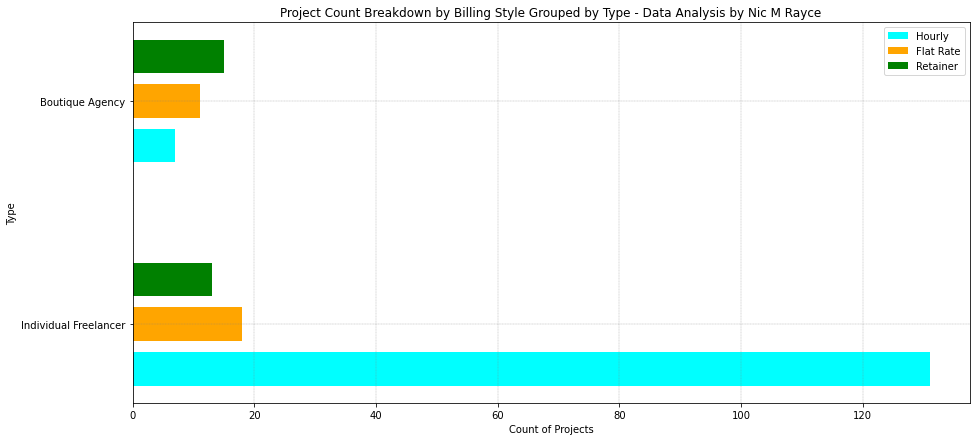

In [139]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query11a = """
    WITH original AS
    (SELECT
    selectsystems.record_id,
    cast(selectsystems.created as date),
    cast(selectsystems.status_last_modified as date),
    selectsystems.billing_style as "Billing Style",
    array_to_string(selectsystems.type_from_expert, '', '*') as "Type",
    selectsystems.sf as "Commission"
    FROM 
    selectsystems
    WHERE 
    array_to_string(selectsystems.type_from_expert, '', '*') = 'Individual Freelancer' 
    OR array_to_string(selectsystems.type_from_expert, '', '*') = 'Boutique Agency')
    
    SELECT count(original."Billing Style") as "Count", 
    original."Billing Style" as "Billing Style", 
    original."Type" as "Type"
    FROM original
    WHERE original."Type" = 'Individual Freelancer'
    GROUP BY original."Type", original."Billing Style"
    ORDER BY 1 DESC
    LIMIT 3
"""
dataset11a = sqlio.read_sql_query(query11a,conn)
df11a = pd.DataFrame(data=dataset11a)
df11a.to_csv('analysis11a.csv')
print(df11a)

query12a = """
    WITH original AS
    (SELECT
    selectsystems.record_id,
    cast(selectsystems.created as date),
    cast(selectsystems.status_last_modified as date),
    selectsystems.billing_style as "Billing Style",
    array_to_string(selectsystems.type_from_expert, '', '*') as "Type",
    selectsystems.sf as "Commission"
    FROM 
    selectsystems
    WHERE 
    array_to_string(selectsystems.type_from_expert, '', '*') = 'Individual Freelancer' 
    OR array_to_string(selectsystems.type_from_expert, '', '*') = 'Boutique Agency')
    
    SELECT count(original."Billing Style") as "Count", 
    original."Billing Style" as "Billing Style", 
    original."Type" as "Type"
    FROM original
    WHERE original."Type" = 'Boutique Agency'
    GROUP BY original."Type", original."Billing Style"
    ORDER BY 1 DESC
    LIMIT 3
"""
dataset12a = sqlio.read_sql_query(query12a,conn)
df12a = pd.DataFrame(data=dataset12a)
df12a.to_csv('analysis12a.csv')
print(df12a)

labels = ['Individual Freelancer', 'Boutique Agency']
hourly = [131,7]
flat = [18, 11]
retainer = [13, 15]

# create data
x = np.arange(2)
y1 = [131,7]
y2 = [18, 11]
y3 = [13, 15]
width = 0.15
  
# plot data in grouped manner of bar type
plt.figure(figsize=(15, 7))
plt.barh(x-0.2, y1, width, color='cyan')
plt.barh(x, y2, width, color='orange')
plt.barh(x+0.2, y3, width, color='green')
plt.yticks(x, ['Individual Freelancer', 'Boutique Agency'])
plt.xlabel("Count of Projects")
plt.ylabel("Type")
plt.legend(["Hourly", "Flat Rate", "Retainer"])
plt.title("Project Count Breakdown by Billing Style Grouped by Type - Data Analysis by Nic M Rayce")
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.3)

plt.show()

    Monthly Period  Number of Experts
0                1                 29
1                2                 47
2                3                 34
3                4                 35
4                5                 39
5                6                 17
6                7                 47
7                8                 43
8                9                 33
9               10                 62
10              11                 81
11              12                  8
12              13                 17
    Month  Retention Rate
0       0          100.00
1       1           94.49
2       2           84.90
3       3           77.96
4       4           70.82
5       5           62.86
6       6           59.39
7       7           49.80
8       8           41.02
9       9           34.29
10     10           21.63
11     11            5.10
12     12            3.47


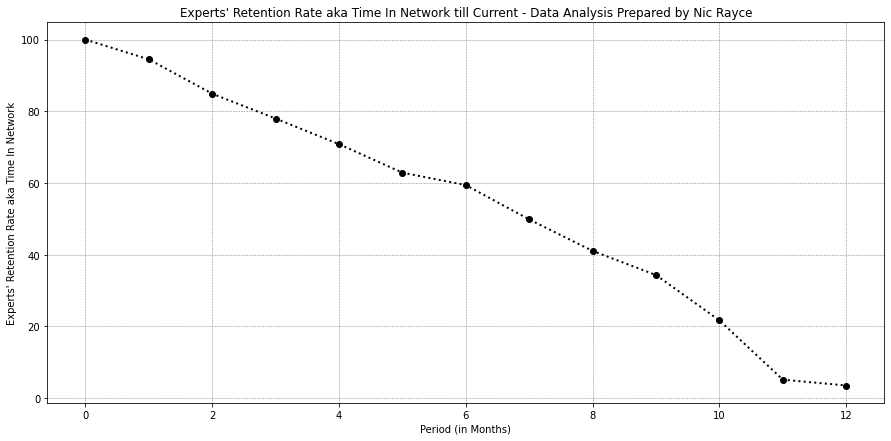

In [26]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")

query13 = """
    
    WITH scenario_1 AS
    (SELECT
    experts.name as "Name",
    cast(experts.status_last_modified as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Available%' and experts.status like 'No Longer%'
    ORDER BY experts.name, experts.created ASC)
      
      , scenario_2 AS 
    (SELECT
    experts.name as "Name",
    cast(now() as date) - cast(experts.status_last_modified as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Send Wel%' and experts.status like 'Available%'
    ORDER BY experts.name, experts.created ASC)
    
    , scenario_3 AS
    (SELECT
    experts.name as "Name",
    cast(now() as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Available%' and experts.status like 'At Ca%'
    ORDER BY experts.name, experts.created ASC)

      , combined AS 
      (SELECT * from scenario_1 UNION SELECT * from scenario_2 UNION SELECT * from scenario_3)
      

SELECT cast(case when "combined"."Period" >= 0 and "combined"."Period" <= 30    then '  1'
            when "combined"."Period" > 30 and "combined"."Period" <= 60   then ' 2'
            when "combined"."Period" > 60 and "combined"."Period" <= 90  then ' 3'
            when "combined"."Period" > 90 and "combined"."Period" <= 120   then ' 4'
            when "combined"."Period" > 120 and "combined"."Period" <= 150  then ' 5'
            when "combined"."Period" > 150 and "combined"."Period" <= 180  then ' 6'
            when "combined"."Period" > 180 and "combined"."Period" <= 210    then ' 7'
            when "combined"."Period" > 210 and "combined"."Period" <= 240   then ' 8'
            when "combined"."Period" > 240 and "combined"."Period" <= 270  then ' 9'
            when "combined"."Period" > 270 and "combined"."Period" <= 300   then ' 10'
            when "combined"."Period" > 300 and "combined"."Period" <= 330  then ' 11'
            when "combined"."Period" > 330 and "combined"."Period" <= 365  then ' 12'
            else '13' end as integer) as "Monthly Period",
            count(*) as "Number of Experts"
            FROM combined
            GROUP BY 1

"""
dataset13 = sqlio.read_sql_query(query13,conn)
df13 = pd.DataFrame(data=dataset13)
df13.to_csv('analysis13.csv')
print(df13)

df14 = pd.read_csv('retention_data.csv')
print(df14)

# Define Data
xdata1=df14['Month']
ydata1=df14['Retention Rate']
xdata2=df13['Monthly Period']
ydata2=df13['Number of Experts']


# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', color ='black', linewidth=2)
plt.title("Experts' Retention Rate aka Time In Network till Current - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Period (in Months)')
plt.ylabel("Experts' Retention Rate aka Time In Network")
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.show()

    Percentage of Active Experts - ALL        Registration Month
0                             0.000000 2022-06-01 00:00:00+00:00
1                             6.451613 2022-05-01 00:00:00+00:00
2                            18.032787 2022-04-01 00:00:00+00:00
3                             8.000000 2022-03-01 00:00:00+00:00
4                             7.692308 2022-02-01 00:00:00+00:00
5                            10.526316 2022-01-01 00:00:00+00:00
6                             2.380952 2021-12-01 00:00:00+00:00
7                            10.526316 2021-11-01 00:00:00+00:00
8                            23.076923 2021-10-01 00:00:00+00:00
9                            12.195122 2021-09-01 00:00:00+00:00
10                           27.500000 2021-08-01 00:00:00+00:00
11                           17.000000 2021-07-01 00:00:00+00:00
12                           53.333333 2021-06-01 00:00:00+00:00
13                           58.333333 2021-05-01 00:00:00+00:00
14                       

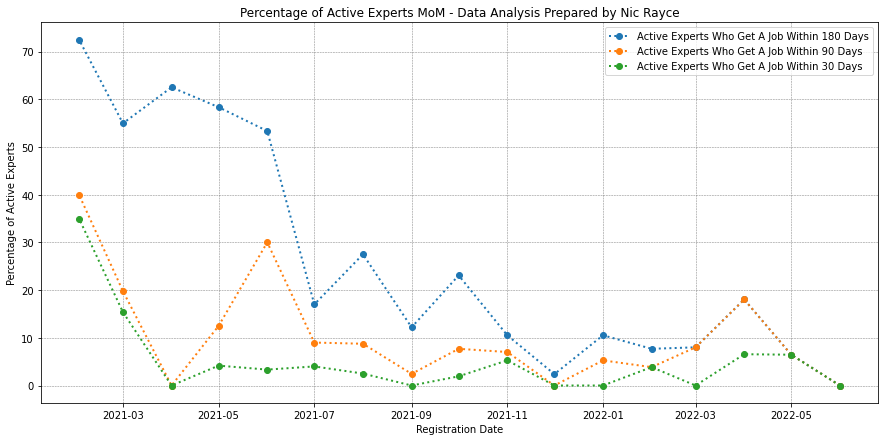

In [14]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts - ALL" , date_trunc('month', cast("source"."Date" as date)) as "Registration Month"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
    cast(sum(CASE WHEN "source"."ID" IS NOT NULL AND 
    "source"."Period" <= 30 THEN 1 ELSE 0 END) as float) / count (*) * 100 AS "Percentage of Active Experts within 30 Days", 
    date_trunc('month', "source"."Registration Date") as "Registration Month"
  FROM
(SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      cast (experts.created as date) as "Registration Date",
      selectsystems.created as "Job Onboarding Date",
      cast(selectsystems.created as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', "source"."Registration Date")
      ORDER BY date_trunc('month', "source"."Registration Date") DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)

query7 = """
    SELECT 
    cast(sum(CASE WHEN "source"."ID" IS NOT NULL AND 
    "source"."Period" <= 90 THEN 1 ELSE 0 END) as float) / count (*) * 100 AS "Percentage of Active Experts within 90 Days", 
    date_trunc('month', "source"."Registration Date") as "Registration Month"
  FROM
(SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      cast (experts.created as date) as "Registration Date",
      selectsystems.created as "Job Onboarding Date",
      cast(selectsystems.created as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', "source"."Registration Date")
      ORDER BY date_trunc('month', "source"."Registration Date") DESC
      """
dataset7 = sqlio.read_sql_query(query7,conn)
df7 = pd.DataFrame(data=dataset7)
print(df7)


# Define Data
xdata1=df5['Registration Month']
ydata1=df5['Percentage of Active Experts - ALL']
xdata2=df7['Registration Month']
ydata2=df7['Percentage of Active Experts within 90 Days']
xdata3=df6['Registration Month']
ydata3=df6['Percentage of Active Experts within 30 Days']

    
# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata2, ydata2, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata3, ydata3, 'o', linestyle = 'dotted', linewidth=2)
plt.legend(['Active Experts Who Get A Job Within 180 Days', 'Active Experts Who Get A Job Within 90 Days' ,'Active Experts Who Get A Job Within 30 Days'])
plt.title("Percentage of Active Experts MoM - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Registration Date')
plt.ylabel('Percentage of Active Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

plt.show()
